# **Image Data Augmentation**


## 데이터가 부족한 세상으로 떠나기 위한 준비

In [9]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

import numpy as np
import matplotlib.pyplot as plt

In [10]:
!wget -O Batman.webp https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAyMjEyMjFfMjQ4%2FMDAxNjcxNTg3NjI5NzI1.PmIQj6EOxndc7faflYgvYhENFM3eFSyY2N0EZN4j5Log.FdoMvikOT-DfZ56ItJEHKKaQAsUjbNXVYw29vpJkTxkg.JPEG%2FIwMEHAD5gmPhr_CMP4kgnr8lyHuU.jpg&type=sc960_832

--2023-03-14 05:54:47--  https://search.pstatic.net/common/?src=http%3A%2F%2Fpost.phinf.naver.net%2FMjAyMjEyMjFfMjQ4%2FMDAxNjcxNTg3NjI5NzI1.PmIQj6EOxndc7faflYgvYhENFM3eFSyY2N0EZN4j5Log.FdoMvikOT-DfZ56ItJEHKKaQAsUjbNXVYw29vpJkTxkg.JPEG%2FIwMEHAD5gmPhr_CMP4kgnr8lyHuU.jpg
Resolving search.pstatic.net (search.pstatic.net)... 23.39.60.242
Connecting to search.pstatic.net (search.pstatic.net)|23.39.60.242|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2023-03-14 05:54:47 ERROR 403: Forbidden.



In [11]:
image_org = load_img("Batman.webp")
image = img_to_array(image_org)
image.shape  # height, width, depth

UnidentifiedImageError: ignored

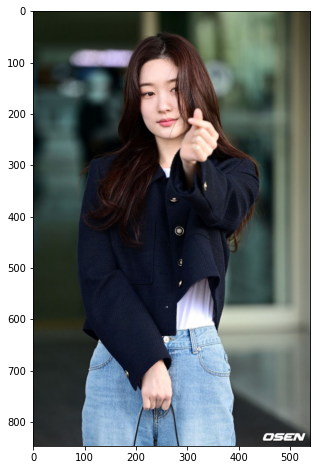

In [6]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [ ]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [ ]:
image.shape

(1, 1600, 1136, 3)

## **ImageDataGenerator**

[전체 옵션 참고](https://keras.io/preprocessing/image/)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전
                         width_shift_range=0.1,  # 이미지 좌우 이동
                         height_shift_range=0.1, # 이미지 상하 이동
                         zoom_range=0.2,         # 확대/축소 범위
                         shear_range=0.2,        # 비스듬히 늘림
                         horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환           
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

In [ ]:
imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image',
                    save_format='jpg' )

In [ ]:
!mkdir output

In [ ]:
!ls output

In [ ]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 10장 채우면 멈추자
    if total == 20:
        break

In [ ]:
!ls output

image_0_1427.jpg  image_0_4855.jpg  image_0_658.jpg   image_0_7542.jpg
image_0_2254.jpg  image_0_5351.jpg  image_0_6855.jpg  image_0_8265.jpg
image_0_2598.jpg  image_0_553.jpg   image_0_687.jpg   image_0_8658.jpg
image_0_2635.jpg  image_0_6327.jpg  image_0_6947.jpg  image_0_9003.jpg
image_0_300.jpg   image_0_6587.jpg  image_0_7159.jpg  image_0_9813.jpg


In [ ]:
import os

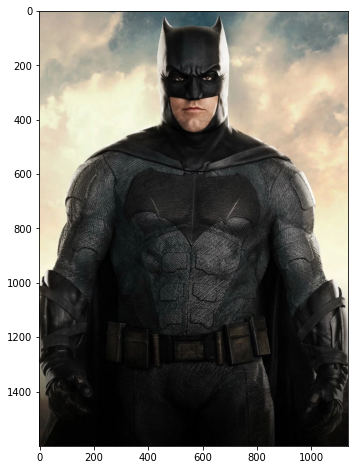

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(image_org) # 아까 것과의 차이는?
plt.show()

In [ ]:
os.listdir('output')

['image_0_1427.jpg',
 'image_0_4855.jpg',
 'image_0_300.jpg',
 'image_0_9813.jpg',
 'image_0_658.jpg',
 'image_0_6327.jpg',
 'image_0_6587.jpg',
 'image_0_6855.jpg',
 'image_0_9003.jpg',
 'image_0_553.jpg',
 'image_0_2598.jpg',
 'image_0_2254.jpg',
 'image_0_7159.jpg',
 'image_0_6947.jpg',
 'image_0_7542.jpg',
 'image_0_5351.jpg',
 'image_0_2635.jpg',
 'image_0_687.jpg',
 'image_0_8658.jpg',
 'image_0_8265.jpg']

In [ ]:
plt.figure(figsize=(20,40))
for i, each in enumerate(os.listdir('output')):
    filepath = './output/' + each

    img = plt.imread(filepath)
    plt.subplot(5, 4, i+1)
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.